<a href="https://colab.research.google.com/github/AarushiShahi/ML-Lab-1BM22CS002/blob/main/Lab_7_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RBF Kernel SVM Results:
Accuracy: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Linear Kernel SVM Results:
Accuracy: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


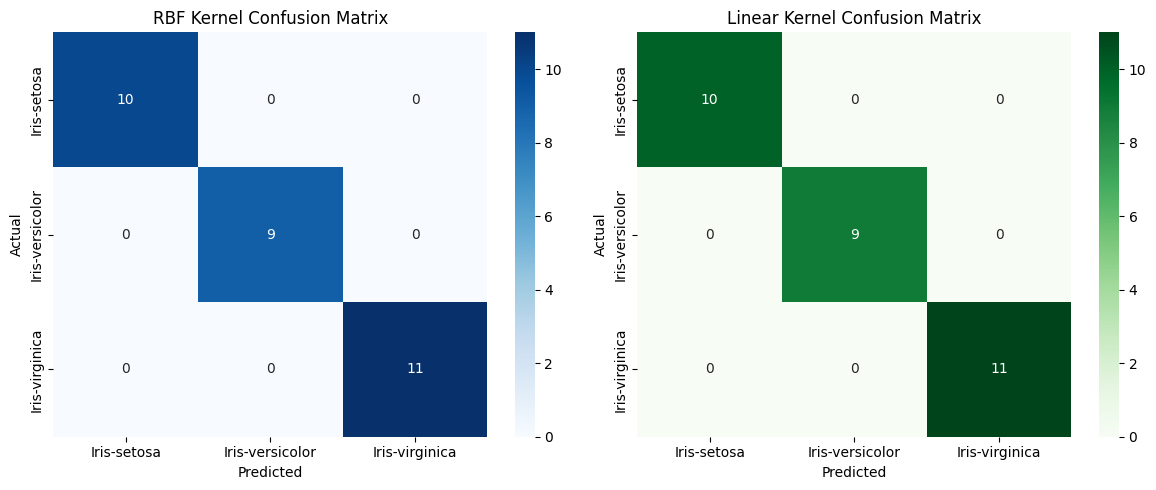

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def classify_iris(file_path="iris.csv"):
    """
    Builds and evaluates SVM classifiers (RBF and linear kernels) on the Iris dataset.

    Args:
        file_path (str): Path to the Iris dataset CSV file.
    """
    try:
        # Load the Iris dataset
        iris_df = pd.read_csv(file_path)

        # Separate features (X) and target (y)
        X = iris_df.drop("species", axis=1)
        y = iris_df["species"]

        # Split the data into training and testing sets (80% train, 20% test)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # SVM with RBF kernel
        svm_rbf = SVC(kernel="rbf")
        svm_rbf.fit(X_train, y_train)
        y_pred_rbf = svm_rbf.predict(X_test)

        # SVM with linear kernel
        svm_linear = SVC(kernel="linear")
        svm_linear.fit(X_train, y_train)
        y_pred_linear = svm_linear.predict(X_test)

        # Evaluate RBF kernel model
        accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
        conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

        # Evaluate linear kernel model
        accuracy_linear = accuracy_score(y_test, y_pred_linear)
        conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)

        # Display results
        print("RBF Kernel SVM Results:")
        print(f"Accuracy: {accuracy_rbf:.4f}")
        print("Confusion Matrix:")
        print(conf_matrix_rbf)

        print("\nLinear Kernel SVM Results:")
        print(f"Accuracy: {accuracy_linear:.4f}")
        print("Confusion Matrix:")
        print(conf_matrix_linear)

        # Optionally, visualize the confusion matrices
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.heatmap(conf_matrix_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=iris_df['species'].unique(), yticklabels=iris_df['species'].unique())
        plt.title('RBF Kernel Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')

        plt.subplot(1, 2, 2)
        sns.heatmap(conf_matrix_linear, annot=True, fmt='d', cmap='Greens', xticklabels=iris_df['species'].unique(), yticklabels=iris_df['species'].unique())
        plt.title('Linear Kernel Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')

        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
classify_iris()

Letter Recognition SVM Results:
Accuracy: 0.9055
Confusion Matrix:
[[144   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0
    1   0   1   0   0   0   1   0]
 [  0 136   0   2   1   0   0   2   0   0   0   0   0   2   0   0   0   3
    1   0   0   4   0   1   1   0]
 [  0   0 116   0   2   0   3   0   0   0   6   0   0   0   5   0   2   0
    0   0   2   0   1   0   0   0]
 [  0   1   0 151   0   0   0   1   0   0   1   0   1   1   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   1   0 123   1   4   0   0   0   1   0   0   0   0   0   2   1
    3   1   0   0   0   1   0   3]
 [  0   3   0   0   2 126   0   0   2   0   0   0   0   0   0   1   0   2
    0   4   0   0   0   0   0   0]
 [  1   0   1   2   0   0 141   0   2   0   4   1   0   0   1   0   2   3
    0   0   0   1   1   0   0   0]
 [  0   1   0   8   1   2   0  94   0   0   7   0   0   5   8   0   0  14
    0   0   2   0   0   0   2   0]
 [  0   0   0   2   0   0   0   0 131   6   0   0   0   0   0

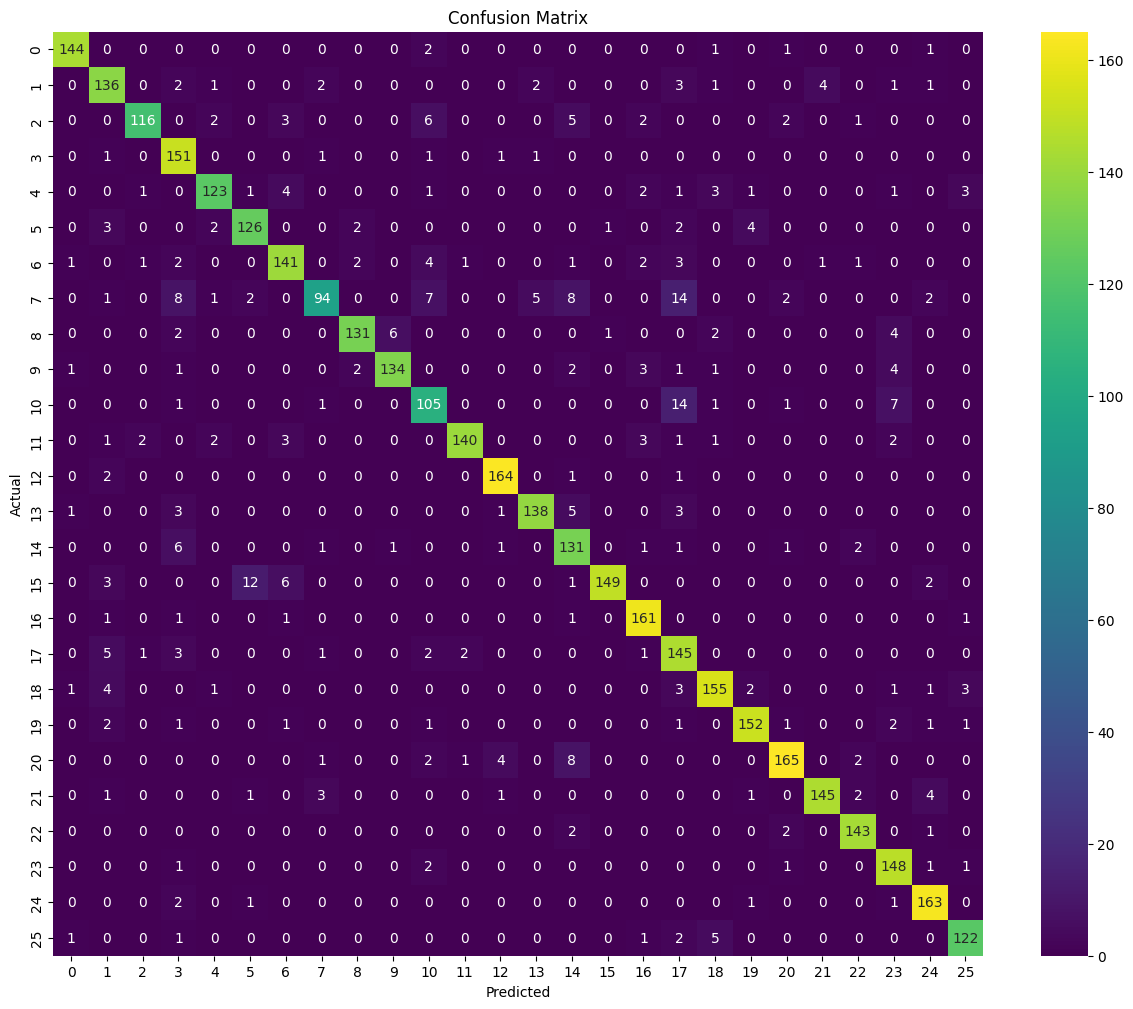

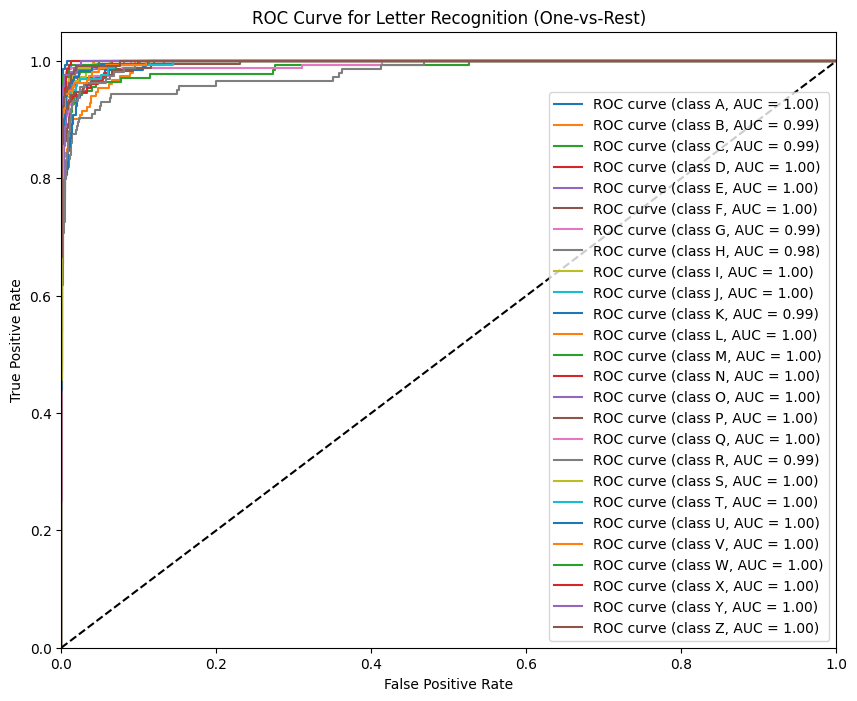

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier

def classify_letters(file_path="letter-recognition.csv"):
    """
    Builds and evaluates an SVM classifier on the Letter Recognition dataset.

    Args:
        file_path (str): Path to the Letter Recognition dataset file.
    """
    try:
        # Load the Letter Recognition dataset
        letters_df = pd.read_csv(file_path)

        # Separate features (X) and target (y)
        X = letters_df.iloc[:, 1:]
        y = letters_df.iloc[:, 0]

        # Encode the target labels (letters) to numerical values
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y)

        # Split the data into training and testing sets (80% train, 20% test)
        X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

        # SVM classifier (using OneVsRest for multiclass)
        svm_classifier = OneVsRestClassifier(SVC(kernel="rbf", probability=True)) #probability=true is crucial for ROC/AUC
        svm_classifier.fit(X_train, y_train)
        y_pred = svm_classifier.predict(X_test)
        y_prob = svm_classifier.predict_proba(X_test) #get probabilities for ROC/AUC

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Display results
        print("Letter Recognition SVM Results:")
        print(f"Accuracy: {accuracy:.4f}")
        print("Confusion Matrix:")
        print(conf_matrix)

        # Plot the confusion matrix
        plt.figure(figsize=(15, 12))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Plot ROC curve and calculate AUC for each class
        n_classes = len(label_encoder.classes_)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curve for each class
        plt.figure(figsize=(10, 8))
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {label_encoder.inverse_transform([i])[0]}, AUC = {roc_auc[i]:.2f})')

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve for Letter Recognition (One-vs-Rest)')
        plt.legend(loc="lower right")
        plt.show()

    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
classify_letters()

Accuracy: 1.00
Support Vectors:
[[145. 480.]
 [155. 520.]
 [150. 500.]
 [168. 590.]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


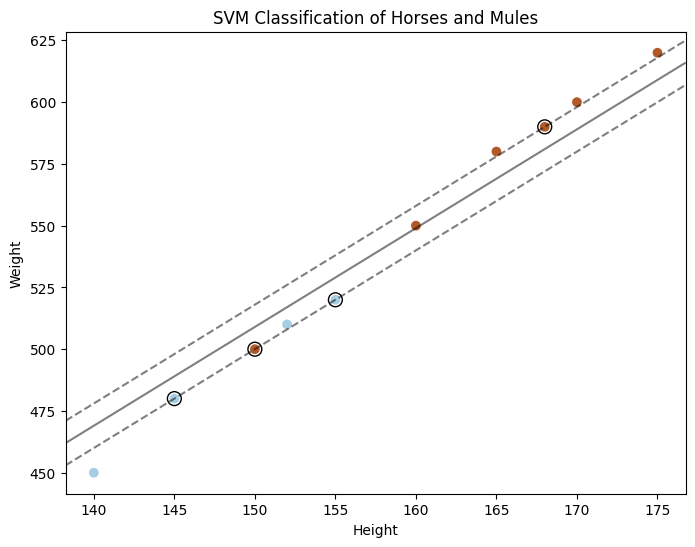

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create a sample dataset (replace with your actual data if available)
data = {
    'Height': [150, 160, 145, 170, 155, 165, 140, 175, 152, 168],
    'Weight': [500, 550, 480, 600, 520, 580, 450, 620, 510, 590],
    'Class': ['Horse', 'Horse', 'Mule', 'Horse', 'Mule', 'Horse', 'Mule', 'Horse', 'Mule', 'Horse']
}

df = pd.DataFrame(data)

# Save to CSV (replace with your actual CSV file name)
df.to_csv('horse_mule_data.csv', index=False)

# Load the CSV file
df = pd.read_csv('horse_mule_data.csv')

# Convert categorical labels to numerical (0 for Mule, 1 for Horse)
df['Class'] = df['Class'].map({'Mule': 0, 'Horse': 1})

# Separate features (X) and target (y)
X = df[['Height', 'Weight']]
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM classifier
svm_classifier = SVC(kernel='linear')  # You can try other kernels like 'rbf'
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get support vectors
support_vectors = svm_classifier.support_vectors_
print("Support Vectors:")
print(support_vectors)

# Plot the data points and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X['Height'], X['Weight'], c=y, cmap=plt.cm.Paired)

# Plot support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k')

# Create a mesh to plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 200),
                     np.linspace(ylim[0], ylim[1], 200))
Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('SVM Classification of Horses and Mules')
plt.show()